In [3]:
import tarfile
import urllib
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from numpy import linalg

In [4]:
# creating training data
x1 = [0.1,0.3,0.1,0.6,0.4,0.6,0.5,0.9,0.4,0.7]
x2 = [0.1,0.4,0.5,0.9,0.2,0.3,0.6,0.2,0.4,0.6]


In [7]:
y1=np.ones(5);
y2= np.zeros(5);
y3= np.concatenate((y1,y2))
y4=np.concatenate((y2,y1))
y=np.vstack((y3,y4))
y=np.array(y)
y.shape

(2, 10)

In [128]:
W2= np.random.normal(0, 1, (2,2))
W3 = np.random.normal(0, 1,(3,2))
W4 = 0.5*np.random.normal(0, 1,(2,3))
b2 = 0.5*np.random.normal(0, 1,(2,1))
b3 = 0.5*np.random.normal(0, 1,(3,1))
b4 = 0.5*np.random.normal(0, 1,(2,1))

print("W2= ",W2)
print("W3= ",W3)
print("W4= ",W4)
print("b2= ",b2)
print("b3= ",b3)
print("b4= ",b4)

    

W2=  [[-0.81731492 -2.36387699]
 [-0.68203002 -0.89499375]]
W3=  [[-0.83919986  0.28412682]
 [ 1.12000612 -0.87889448]
 [-0.05650732  0.69144013]]
W4=  [[ 0.06726083 -0.97762191 -0.1855085 ]
 [ 0.90896838  0.70694279 -0.3699241 ]]
b2=  [[-0.1314706 ]
 [ 0.50901754]]
b3=  [[-0.28958784]
 [-0.54620045]
 [-0.26768891]]
b4=  [[-0.26978014]
 [-0.82908278]]


In [129]:
eta = 0.05        # learning rate       
Niter = 100000     #number of SG iterations 1e6
savecost = np.zeros(int(Niter)) # value of cost function at each iteration



In [130]:
def activate(x,W,b):
  
    return 1/(1+np.exp(-(W.dot(x)+b)))


In [131]:
def cost(W2,W3,W4,b2,b3,b4):
    costvec = np.zeros(10);
    for i in range (10):
        x = np.vstack((x1[i],x2[i]))
        a2 = activate(x,W2,b2)
        a3 = activate(a2,W3,b3)
        a4 = activate(a3,W4,b4)
        d=y[:,i].reshape(2,1)- a4
        costvec[i] = np.linalg.norm(d)
    return np.linalg.norm(costvec)*np.linalg.norm(costvec) #np.linalg.norm for euclidean norm


In [132]:

for counter in range(Niter):
    k = random.randint(0,9)      # choose a training point at random
    x = np.array([x1[k] ,x2[k]]).reshape(2,1)
    #forward pass
    a2 = activate(x,W2,b2)
    a3 = activate(a2,W3,b3)
    a4 = activate(a3,W4,b4)
    # Backward pass
    delta4 = np.multiply(np.multiply(a4,(1-a4)),(a4-y[:,k].reshape(2,1))) #np.multiply for element wise vector multi
    delta3 =np.multiply(np.multiply(a3,(1-a3)),(W4.T.dot(delta4)))
    delta2 = np.multiply(np.multiply(a2,(1-a2)),(W3.T.dot(delta3)))
    #gradient step
    W2 = W2 - eta*delta2.dot(x.reshape(1,2))
    W3 = W3 - eta*delta3.dot(a2.T)
    W4 = W4 - eta*delta4.dot(a3.T)
    b2 = b2 - eta*delta2;
    b3 = b3 - eta*delta3;
    b4 = b4 - eta*delta4;
    newcost = cost(W2,W3,W4,b2,b3,b4)
    savecost[counter] = newcost
    

In [121]:
s=y[:,1]
s.reshape(2,1)
s.reshape(1,2)

array([[1., 0.]])

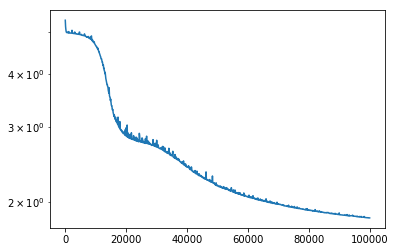

In [133]:

#semilogy([1:1e4:Niter`],savecost(1:1e4:Niter))
a= np.arange(1,Niter, 100)

plt.semilogy(a, savecost[a])

plt.show()

In [134]:
#part 2
print("Properly trained Weight matrices and bias vectors:")
print("W2= ", W2)
print("W3= ", W3)
print("W4= ", W4)
print("b2= ", b2)
print("b3= ", b3)
print("b4= ", b4)

Properly trained Weight matrices and bias vectors:
W2=  [[ -2.35075385  -3.2789506 ]
 [-11.19185255  -6.28927098]]
W3=  [[-1.10418688 -2.18247417]
 [-0.37533465 -8.29466988]
 [ 0.83569915  6.98828262]]
W4=  [[-0.10703226 -4.50574848  4.93564639]
 [ 1.20947927  4.12068334 -4.82906526]]
b2=  [[-0.8538935 ]
 [ 5.70307262]]
b3=  [[ 1.00182419]
 [ 3.90926243]
 [-3.64119868]]
b4=  [[ 2.42396753]
 [-2.79066177]]


In [135]:
    x_test=np.array([0.333,0.5]).reshape(2,1)
    #forward pass
    a2 = activate(x_test,W2,b2)
    a3 = activate(a2,W3,b3)
    a4 = activate(a3,W4,b4)
    print(a4)
    #therefore it belongs to category 2,as the a4 vector is closer to y=[0;1]
    print("x_test is in category 2")
    print("category 2: ")
    y=np.vstack([0,1])
    y

[[0.27639894]
 [0.71998391]]
x_test is in category 2
category 2: 


array([[0],
       [1]])

In [73]:
#testing
i=1
x = np.vstack((x1[i],x2[i]))
x

array([[0.3],
       [0.4]])